### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [8]:
# os.getcwd()

'C:\\Users\\dexte\\sparklyRGT\\sparklyRGT_tutorial\\used_templates'

In [9]:
os.chdir('C:\\Users\\dexte\\sparklyRGT\\data')
file_names = ['BH07_raw_free_S29-30.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [10]:
control_group = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,16] #In this example: Tg negative rats

exp_group = list(range(17,33)) #In this example: Tg positive rats

group_names = {0: 'control',
              1: 'experimental'} 

group_list = [control_group, exp_group]

title = '' #for plotting

startsess = 29 #first session you would like to include in figures
endsess = 30 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [19]:
# rgt.check_sessions(df)

### Drop/edit session numbers

In [12]:
df2 = rgt.drop_sessions(df, [28])

### Check that you dropped/edited the desired session(s)

In [20]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [50]:
df_sum = rgt.get_summary_data(df2) #change to df instead of df2 if you didn't do any session editing
df_sum.columns

Index(['29P1', '29P2', '29P3', '29P4', '30P1', '30P2', '30P3', '30P4',
       'risk29', 'risk30', 'collect_lat29', 'collect_lat30', 'choice_lat29',
       'choice_lat30', 'omit29', 'omit30', 'trial29', 'trial30', 'prem29',
       'prem30'],
      dtype='object')

### Get the risk status of the rats


In [59]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
# print(risky, optimal) 

    mean_risk risk_status
1   73.904211           1
2   56.148148           1
3  -77.502528           2
4   57.762280           1
5  -81.274038           2
6   38.676471           1
7  -73.426573           2
8   91.855505           1
9  -81.161921           2
11  98.495900           1
12  32.942097           1
13 -33.705357           2
14  43.214286           1
15 -41.344124           2
16 -30.296896           2
17   0.633446           1
18  41.629689           1
19   4.054054           1
20  91.116505           1
21  11.868687           1
22  62.978469           1
23  75.345912           1
24  71.178218           1
25 -98.437500           2
26  35.270270           1
27  44.732745           1
28  43.102453           1
29 -30.433996           2
30  94.573643           1
31  80.796731           1
32   1.587302           1


### Export your data to an Excel file 


In [16]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [17]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
control,11.6732,38.7743,34.41,15.1425,11.5657,42.9393,30.8812,14.6138,0.895057,9.00994,...,1.89022,2.04053,1.73333,2.06667,80.6933,80.4933,15.9826,18.525,4.9525,1.46667
experimental,9.84908,56.8833,21.9366,11.331,10.3677,56.0247,20.6177,12.9899,33.4648,32.7848,...,1.99457,1.87825,3.0625,4.125,82.9563,87.3312,16.2839,15.5794,33.1248,1.125


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

In [60]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]


group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
Control risky,4.63113,13.4097,64.3735,17.5857,4.98245,17.1608,61.1288,16.728,-63.9184,-55.7135,1.05269,1.07344,2.29307,2.51043,2.14286,3.28571,60.3,58.6143,13.1988,17.5935,-59.8159,2
Experimental risky,13.2911,5.06329,76.5823,5.06329,7.92411,9.28571,72.0759,10.7143,-63.2911,-65.5804,1.27486,1.2145,1.59508,1.70251,0,1.5,72.5,68.5,17.7348,18.4904,-64.4357,2
Control optimal,17.835,60.9684,8.19192,13.0047,17.326,65.4955,4.4146,12.7639,57.6068,65.6429,1.46226,1.51179,1.53772,1.62936,1.375,1,98.5375,99.6375,18.4184,19.3401,61.6249,1
Experimental optimal,9.35736,64.2862,14.1301,12.2264,10.7168,62.7017,13.2666,13.315,47.2871,46.8369,1.46833,1.44585,2.05164,1.90335,3.5,4.5,84.45,90.0214,16.0766,15.1635,47.062,1


In [61]:
import researchpy as rp

In [62]:
df_sum

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,1.077168,1.286471,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485,73.904211,1
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.607407,1.387458,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557,56.148148,1
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,1.023333,1.026522,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000,-77.502528,2
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,1.263699,1.133429,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750,57.762280,1
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.807188,1.098889,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470,-81.274038,2
6,2.5,70,0,27.5,2.94118,63.2353,0,33.8235,45,32.3529,1.055714,1.061136,2.172000,1.859265,8,7,88.0,75.0,9.278351,15.730337,38.676471,1
7,3.07692,10.7692,64.6154,21.5385,1.81818,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.839412,0.929643,1.012615,1.194545,0,0,65.0,56.1,16.666667,34.523810,-73.426573,2
8,2.41935,92.7419,0.806452,4.03226,2.47934,94.2149,1.65289,1.65289,90.3226,93.3884,1.791649,1.724421,1.850484,1.956033,0,0,124.0,121.0,10.144928,12.949640,91.855505,1
9,3.27869,3.27869,90.1639,3.27869,5.26316,7.01754,82.4561,5.26316,-86.8852,-75.4386,0.748000,0.711429,2.300328,2.754211,1,4,62.0,61.0,20.512821,11.594203,-81.161921,2
11,10.687,88.5496,0.763359,0,8.14815,91.1111,0,0.740741,98.4733,98.5185,1.406731,1.543853,1.950153,1.667852,1,0,132.0,136.1,2.222222,7.534247,98.495900,1


In [63]:
# df_sum['risk_status'].replace({1: 'optimal', 2: 'risky'}, inplace = True)
# df_sum

In [68]:
rp.summary_cont(df_sum['risk29'])
# df_sum
df_sum.risk_status = df_sum.risk_status.astype(int)
df_sum.risk29 = df_sum.risk29.astype(int)

In [69]:
rp.summary_cont(df_sum['risk29'].groupby(df_sum['risk_status']))

,N,Mean,SD,SE,95% Conf.,Interval
risk_status,,,,,,
1,22,50.7273,33.5349,7.1497,35.8587,65.5958
2,9,-63.3333,29.8035,9.9345,-86.2423,-40.4243


In [70]:
import scipy.stats as stats 

In [71]:
stats.f_oneway(df_sum['risk29'][df_sum['risk_status'] == 1],
               df_sum['risk29'][df_sum['risk_status'] == 2])

F_onewayResult(statistic=78.43650226233888, pvalue=9.623661603223998e-10)

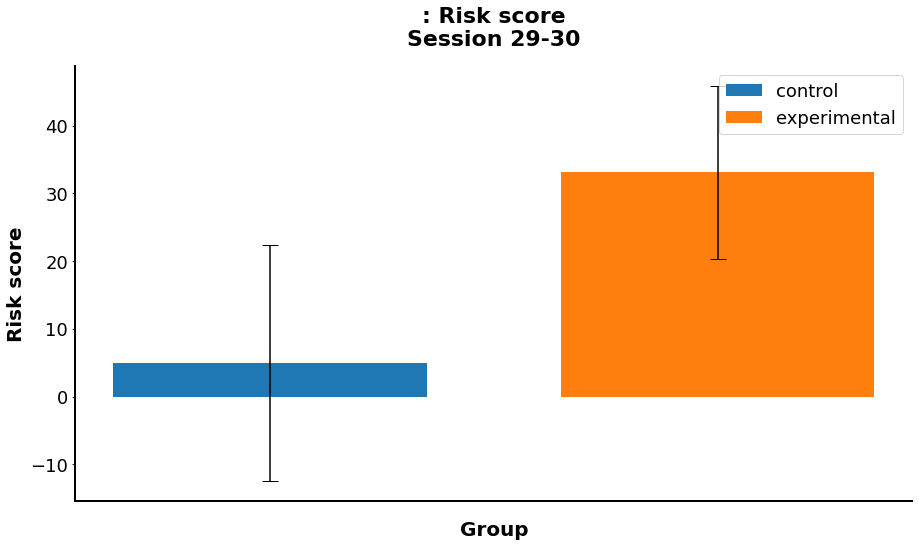

In [28]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score')